# KNN(k-Nearest Neighbor）

> #### __KNN__ is a relatively simple machine learning algorithm. Its core idea is that the category of the predicted sample is determined by its `k` nearest neighbor voting.

## Classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# https://scikit-learn.org/0.17/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.datasets.samples_generator import make_blobs
centers = [[-2, 2], [2, 2], [0, 4]]
X, y = make_blobs(n_samples=60, centers=centers, random_state=0, cluster_std=0.60)

[[ 1.59652373  1.7842681 ]
 [-1.08033247  2.88161526]
 [-2.20874729  2.09380938]
 [ 2.68364041  1.25910451]
 [-1.54337736  2.07300501]] [1 0 0 1 0]


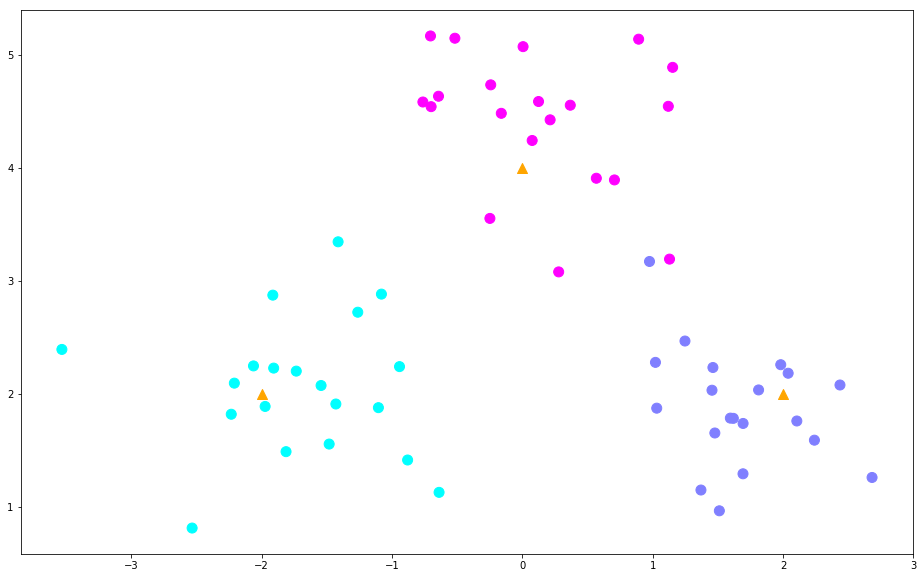

In [8]:
# Show the dataset.
plt.figure(figsize=(16, 10))
c = np.array(centers)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='cool')
plt.scatter(c[:, 0], c[:, 1], s=100, marker='^', c='orange')
print(X[:5],y[:5])

In [4]:
# Build model
from sklearn.neighbors import KNeighborsClassifier
# We need to find 5 the nearest points. So k=5
k = 5
clf = KNeighborsClassifier(n_neighbors=k)

# Train model
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
# Predicting a new sample.
x_new = [[0, 2]]  # Attention should be paid to feature input.
x_new = np.array(x_new)
y_new = clf.predict(x_new)
print(x_new,y_new)
neighbors = clf.kneighbors(x_new, return_distance = False)

[[0 2]] [0]


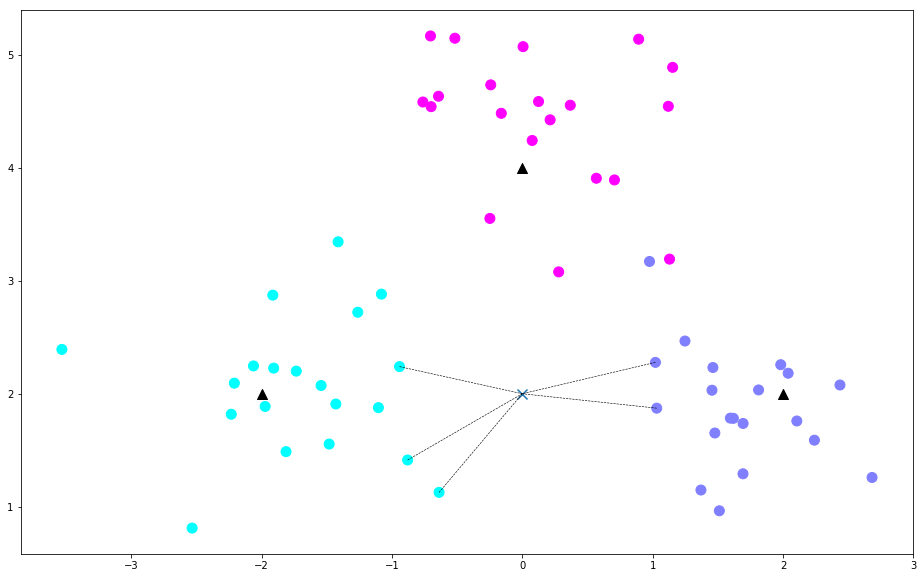

In [12]:
plt.figure(figsize=(16, 10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='cool')    
plt.scatter(c[:, 0], c[:, 1], s=100, marker='^', c='k')   
plt.scatter(x_new[0][0], x_new[0][1], marker="x", 
            s=100, cmap='cool')    

for i in neighbors[0]:
    # The connection between the sample point and five points closest to .
    plt.plot([X[i][0], x_new[0][0]], [X[i][1], x_new[0][1]], 
             'k--', linewidth=0.6);

## Regression

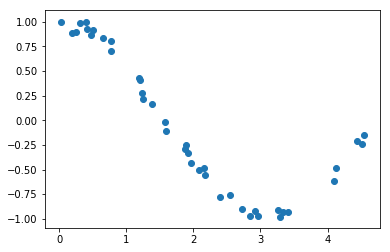

In [26]:
n_dots = 40
X = 5 * np.random.rand(n_dots, 1)
y = np.cos(X).ravel()

y += 0.2 * np.random.rand(n_dots) - 0.1
plt.scatter(X,y)

In [27]:
from sklearn.neighbors import KNeighborsRegressor

k = 5
model = KNeighborsRegressor(k)
model.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [30]:
T = np.linspace(0, 5, 500)[:, np.newaxis]
y_pred = model.predict(T)
model.score(X, y)

0.9834860238221923

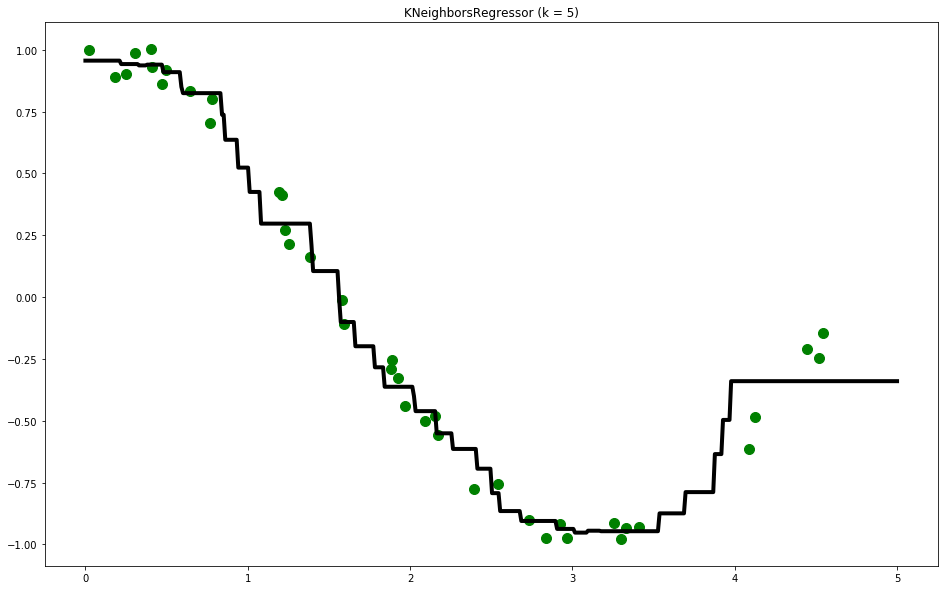

In [31]:
plt.figure(figsize=(16, 10))
plt.scatter(X, y, c='g', label='data', s=100)         
plt.plot(T, y_pred, c='k', label='prediction', lw=4) 
plt.axis('tight')
plt.title("KNeighborsRegressor (k = %i)" % k)
plt.show()

### Advantage:
> * Mature theory, simple thought, it can be used for classification and for regression.
> * It can be used for nonlinear classification.
> * High accuracy and insensitivity to outliers.

### Disadvantages:
> * Huge amount of computation.|
> * Sample imbalance problem exists.